In [ ]:
import pandas as pd
from sqlalchemy import create_engine
from pandas.io import sql
import pickle
import os.path
from os import path

In [ ]:
hostname='95.217.156.58'
dbname='crimeStats'
uname='sandwich'
pwd='321#@!IdiotSandwich'
!pip install pymysql


     |████████████████████████████████| 51kB 1.9MB/s 


In [ ]:
engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}".format(host=hostname, db=dbname, user=uname, pw=pwd))


In [ ]:
# pulls clean data from repo and saves locally
if path.exists("crime.dat"):
    print("Found crime data. Loading as pandas df")
    fh = open("crime.dat", 'rb')
    df = pickle.load(fh)
    fh.close()
else:
    print("Crime data not downloaded, saving file in root dir as crime.dat")
    print("Downloading 1.2GB, this may take a while...")
    df = pd.read_sql('SELECT * FROM crimeTable', con=engine)
    fh = open('crime.dat', 'wb+')
    pickle.dump(df, fh)
    fh.close()

Crime data not downloaded, saving file in root dir as crime.dat


In [ ]:
df.info

<bound method DataFrame.info of          arrest_key  ... :@computed_region_sbqj_enih
0         192799737  ...                        16.0
1         193260691  ...                         8.0
2         149117452  ...                        40.0
3         190049060  ...                        49.0
4          24288194  ...                        49.0
...             ...  ...                         ...
3881984    24592084  ...                        52.0
3881985    24028282  ...                        41.0
3881986    24036787  ...                        16.0
3881987    24028407  ...                        47.0
3881988    24321597  ...                        18.0

[3881989 rows x 18 columns]>

In [ ]:
df.isnull().sum()

arrest_key                         0
arrest_date                        0
pd_desc                            0
ofns_desc                          0
law_code                           0
law_cat_cd                     13360
age_group                          0
perp_sex                           0
perp_race                          0
latitude                           0
longitude                          0
arrest_boro                        0
arrest_precinct                    0
jurisdiction_code                  0
:@computed_region_f5dn_yrer     5976
:@computed_region_yeji_bk3q     5980
:@computed_region_92fq_4b7q     5976
:@computed_region_sbqj_enih     5977
dtype: int64

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import folium
from folium.plugins import HeatMap
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)


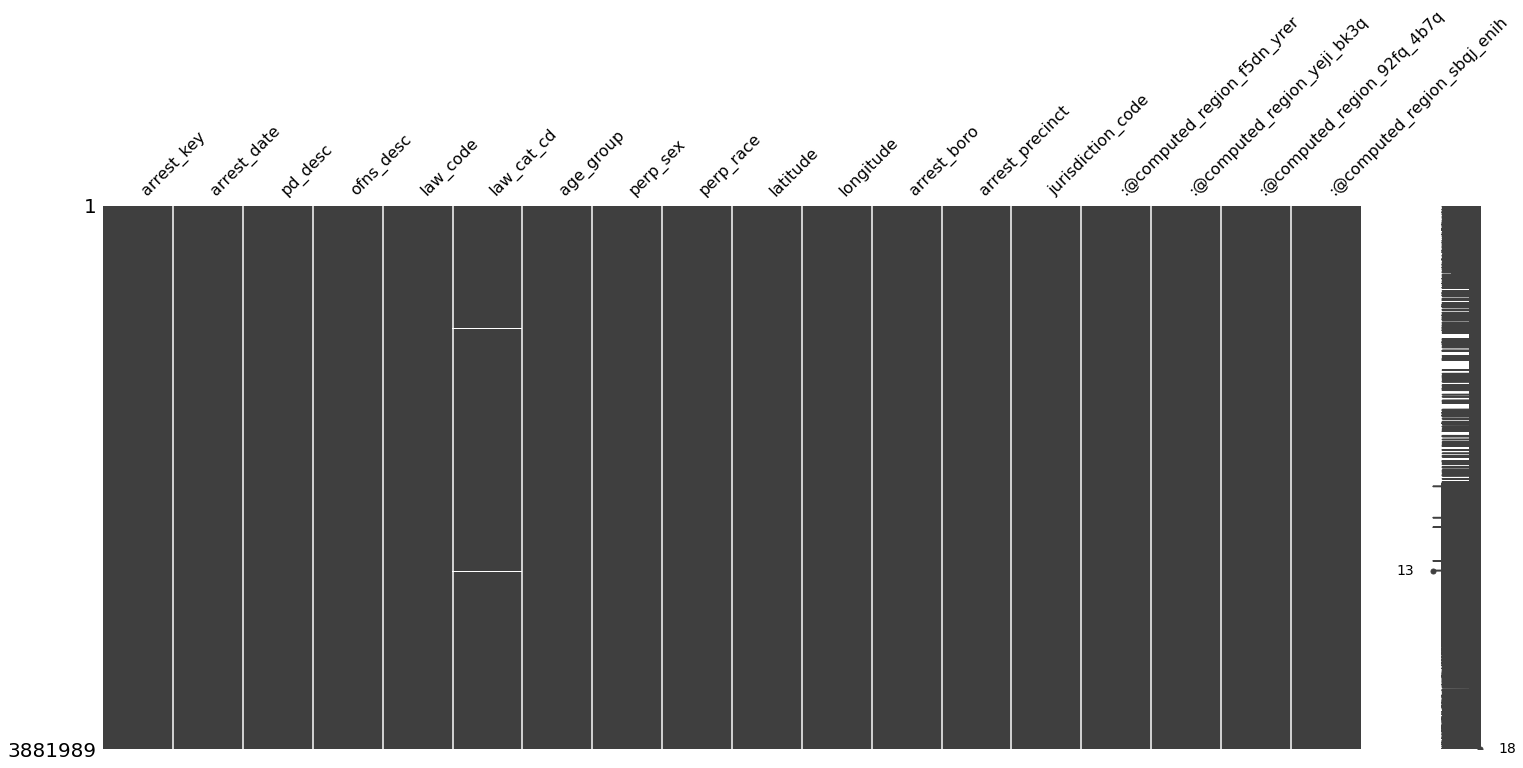

In [ ]:
import missingno as msno
msno.matrix(df)
plt.show()

In [ ]:
df.columns

Index(['arrest_date', 'pd_desc', 'ofns_desc', 'law_cat_cd', 'age_group',
       'perp_sex', 'perp_race', 'latitude', 'longitude', 'arrest_boro',
       'arrest_precinct', 'jurisdiction_code', ':@computed_region_f5dn_yrer',
       ':@computed_region_yeji_bk3q', ':@computed_region_92fq_4b7q',
       ':@computed_region_sbqj_enih'],
      dtype='object')

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
latitude,3881989.0,40.756404,0.444853,40.498905,40.679569,40.741665,40.816089,62.083075
longitude,3881989.0,-73.923799,0.072183,-74.254939,-73.967077,-73.925476,-73.885857,-73.681780
arrest_precinct,3881989.0,60.633380,34.310000,1.000000,33.000000,60.000000,84.000000,123.000000
jurisdiction_code,3881989.0,1.303597,9.418710,0.000000,0.000000,0.000000,0.000000,97.000000
:@computed_region_f5dn_yrer,3876013.0,36.881899,20.969158,1.000000,17.000000,41.000000,55.000000,71.000000
:@computed_region_yeji_bk3q,3876009.0,3.379998,1.207421,1.000000,2.000000,4.000000,4.000000,5.000000
:@computed_region_92fq_4b7q,3876013.0,28.686845,14.150324,1.000000,17.000000,31.000000,40.000000,51.000000
:@computed_region_sbqj_enih,3876012.0,37.462995,21.318454,1.000000,21.000000,35.000000,54.000000,77.000000


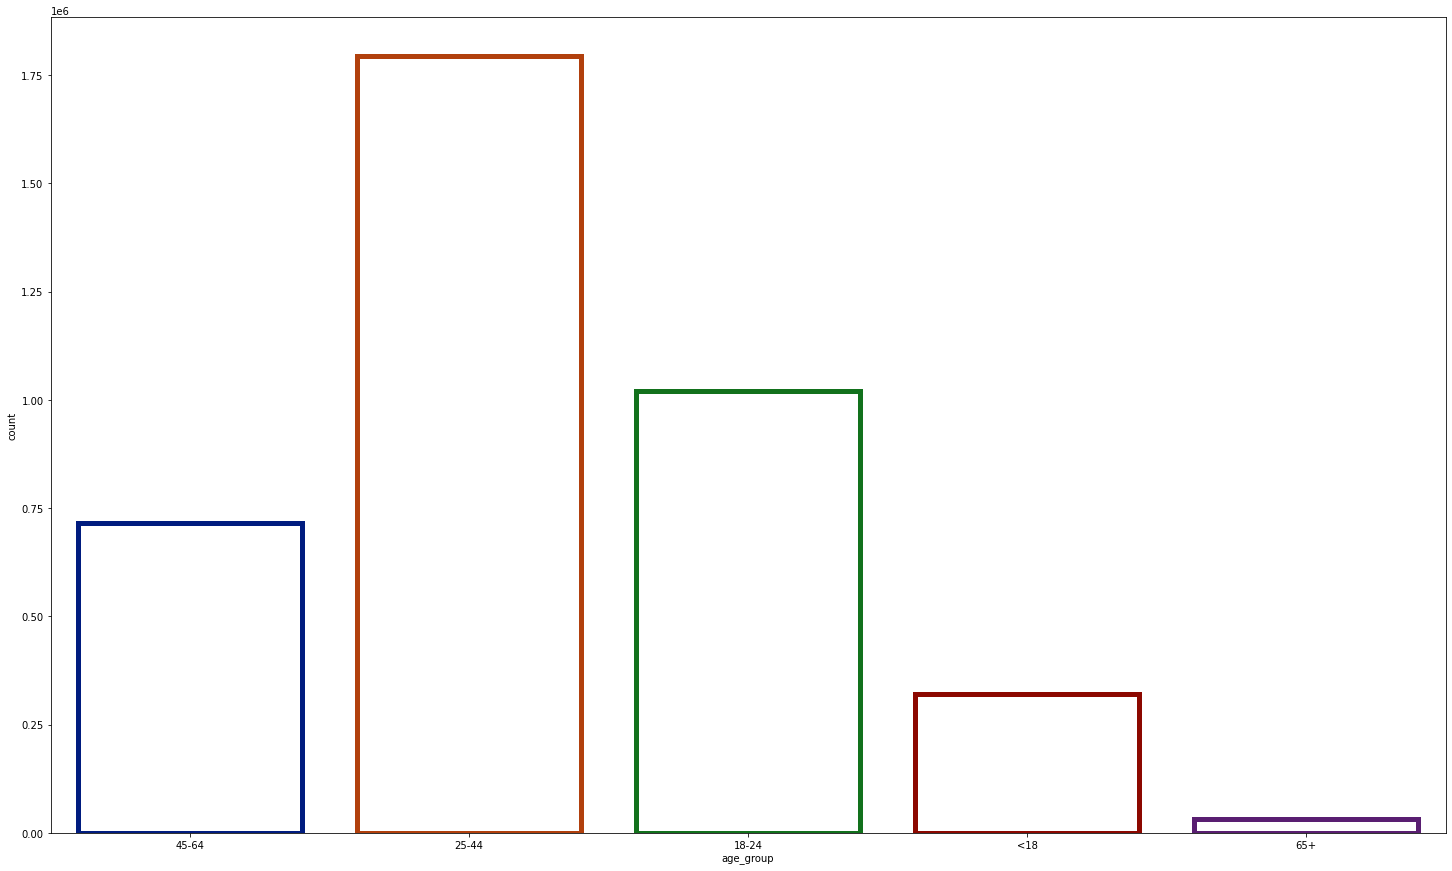

In [ ]:
plt.figure(figsize=(25,15))
ax = sns.countplot(x="age_group", data=df,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 24))

In [ ]:
x = df.age_group
y = df.arrest_date

fig = go.Figure(go.Histogram2d(
        x=x,
        y=y
    ))
fig.show()

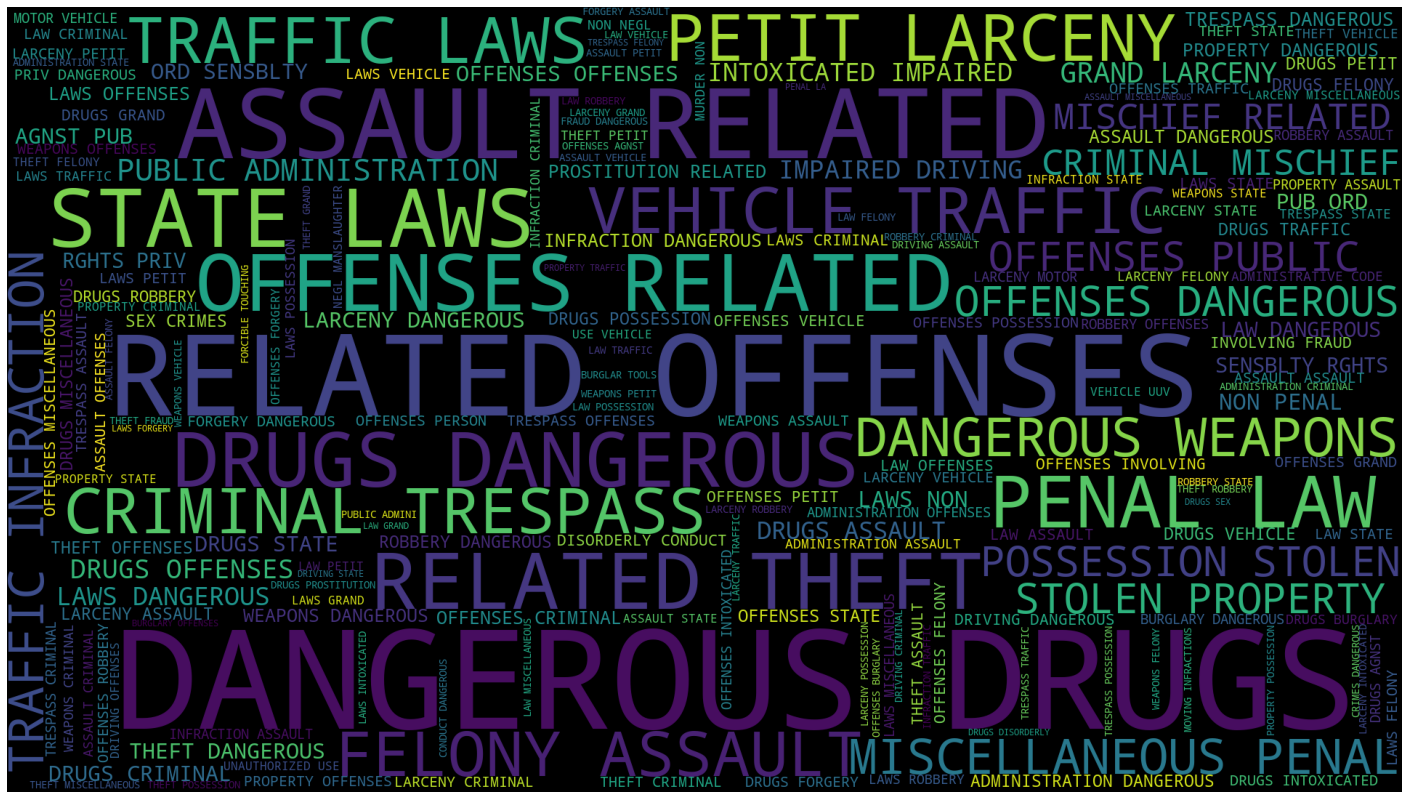

In [ ]:
plt.figure(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.ofns_desc))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

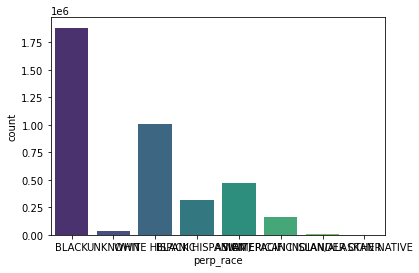

In [ ]:
sns.countplot(x='perp_race',data=df,palette='viridis')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import folium


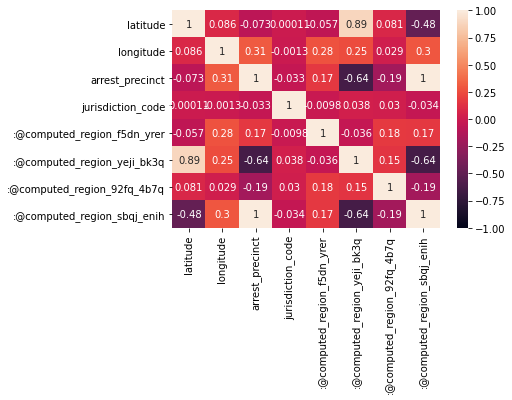

In [ ]:
sns.heatmap(df.corr(),vmin=-1,annot=True)

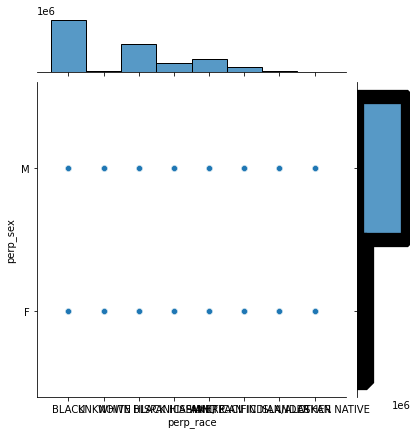

In [ ]:
sns.jointplot(x='perp_race',y='perp_sex',data=df,palette='deep')

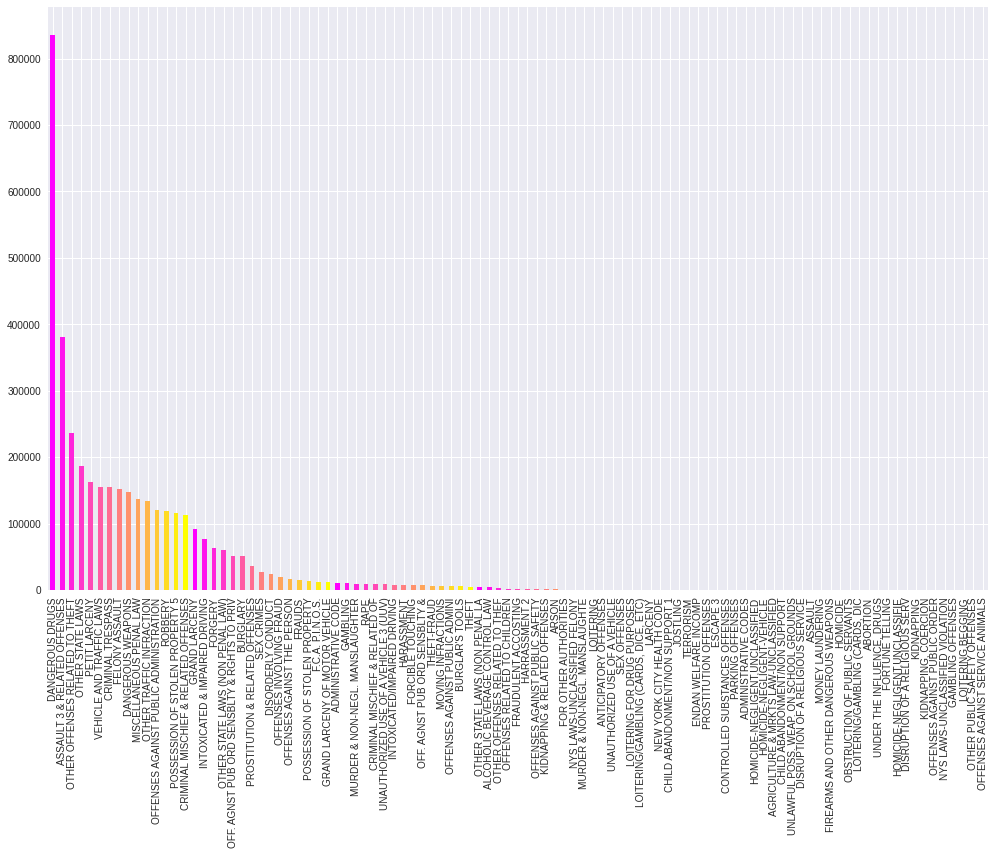

In [ ]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('seaborn')

color = plt.cm.spring(np.linspace(0, 1, 15))
df['ofns_desc'].value_counts().plot.bar(color = color, figsize = (15, 10))

plt.xticks(rotation = 90)
plt.show()

In [ ]:
import plotly.express as px